# Mini Project 2 for Insurance Data Analysis

In [229]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import copy
import scipy.stats as st
from math import *
from sklearn.preprocessing import LabelEncoder

In [102]:
#Read the data as a data frame
insu= pd.read_csv('insurance.csv')
insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
#EDA - shape of Data
insu.shape

(1338, 7)

In [104]:
#EDA - type of Data
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
#EDA - Checking the presence of missing values
insu.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [106]:
#EDA - 5 point summary of numerical attributes
insu.describe() # the output results provide the five number summary of the data.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
#EDA - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
#colums
insu[['age','bmi','charges']].head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


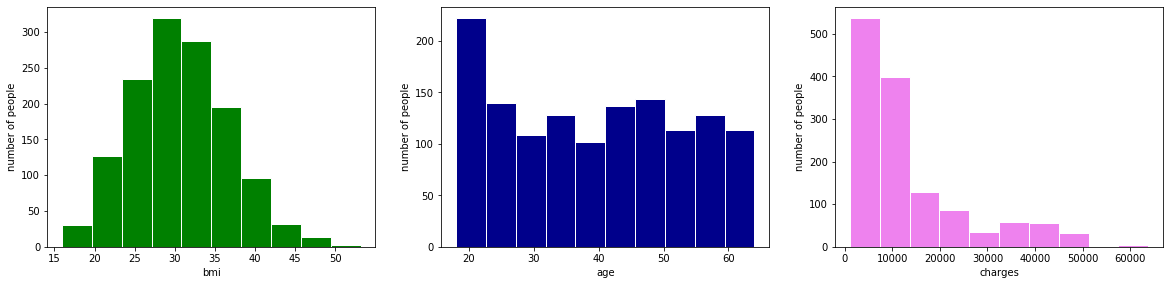

In [108]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insu.bmi, color='green',edgecolor = 'white')
plt.xlabel('bmi')
plt.ylabel('number of people')

plt.subplot(3,3,2)
plt.hist(insu.age, color='darkblue',edgecolor = 'white')
plt.xlabel('age')
plt.ylabel('number of people')

plt.subplot(3,3,3)
plt.hist(insu.charges, color='violet', edgecolor = 'white')
plt.xlabel('charges')
plt.ylabel('number of people')
plt.show()

In [109]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Skewness = pd.DataFrame({'Skewness' : [st.skew(insu.bmi),st.skew(insu.age),st.skew(insu.charges)]},
                        index=['bmi','age','charges']) 
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [110]:
# identify outliers for charges
q25, q75 = np.percentile(insu['charges'], 25), np.percentile(insu['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in insu['charges'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 139


In [111]:
# identify outliers for charges
q25, q75 = np.percentile(insu['bmi'], 25), np.percentile(insu['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in insu['bmi'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 9


In [112]:
# identify outliers for charges
q25, q75 = np.percentile(insu['age'], 25), np.percentile(insu['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in insu['age'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 0


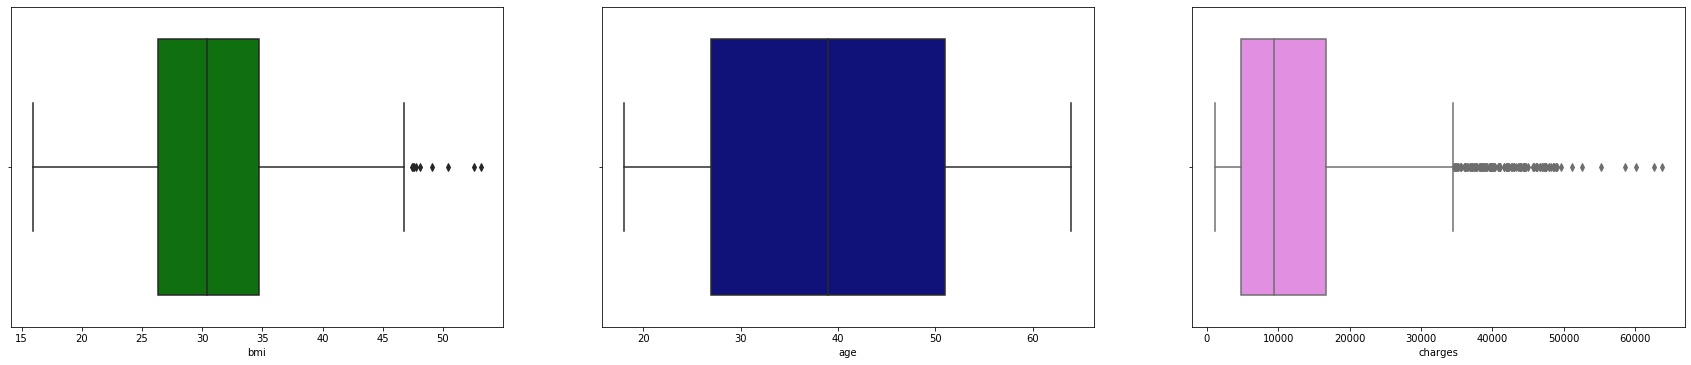

In [113]:
plt.figure(figsize= (30,20))
plt.subplot(3,3,1)
sns.boxplot(insu['bmi'], color='green')

plt.subplot(3,3,2)
sns.boxplot(insu['age'], color='darkblue')
plt.subplot(3,3,3)

sns.boxplot(insu['charges'], color='violet')
plt.show()

Obeservation:
- We can see from the column and Box plots its quite clear that there are lot of outliners in 'Bmi' and 'Charges'.
- The Data in 'age' is quite uniformly Distributed.


(-1.1018718496698334,
 1.1000891356985636,
 -1.1027154146109623,
 1.1011093550812814)

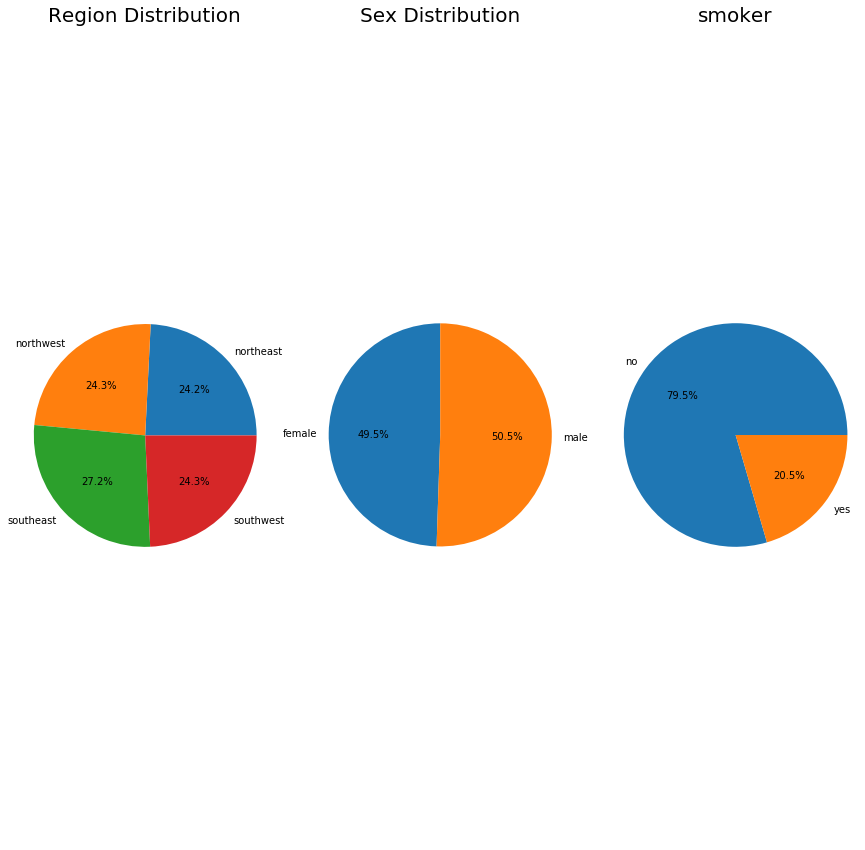

In [155]:
#Distribution of categorical columns
fig1, ((ax11,ax12,ax13)) = plt.subplots(1,3)
fig1.set_size_inches(15,15)
ax11.pie(data.groupby("region").size().values, labels=data.groupby('region').size().keys(), autopct='%1.1f%%')
ax11.set_title("Region Distribution", fontsize=20)
ax11.axis('equal')
#Create a pie chart of the sex distribution
ax12.pie(data.groupby("sex").size().values, labels=data.groupby('sex').size().keys(), autopct='%1.1f%%', startangle=90)
ax12.set_title("Sex Distribution", fontsize=20)
ax12.axis('equal')
ax13.pie(data.groupby("smoker").size().values, labels=data.groupby('smoker').size().keys(), autopct='%1.1f%%')
ax13.set_title("smoker", fontsize=20)
ax13.axis('equal')

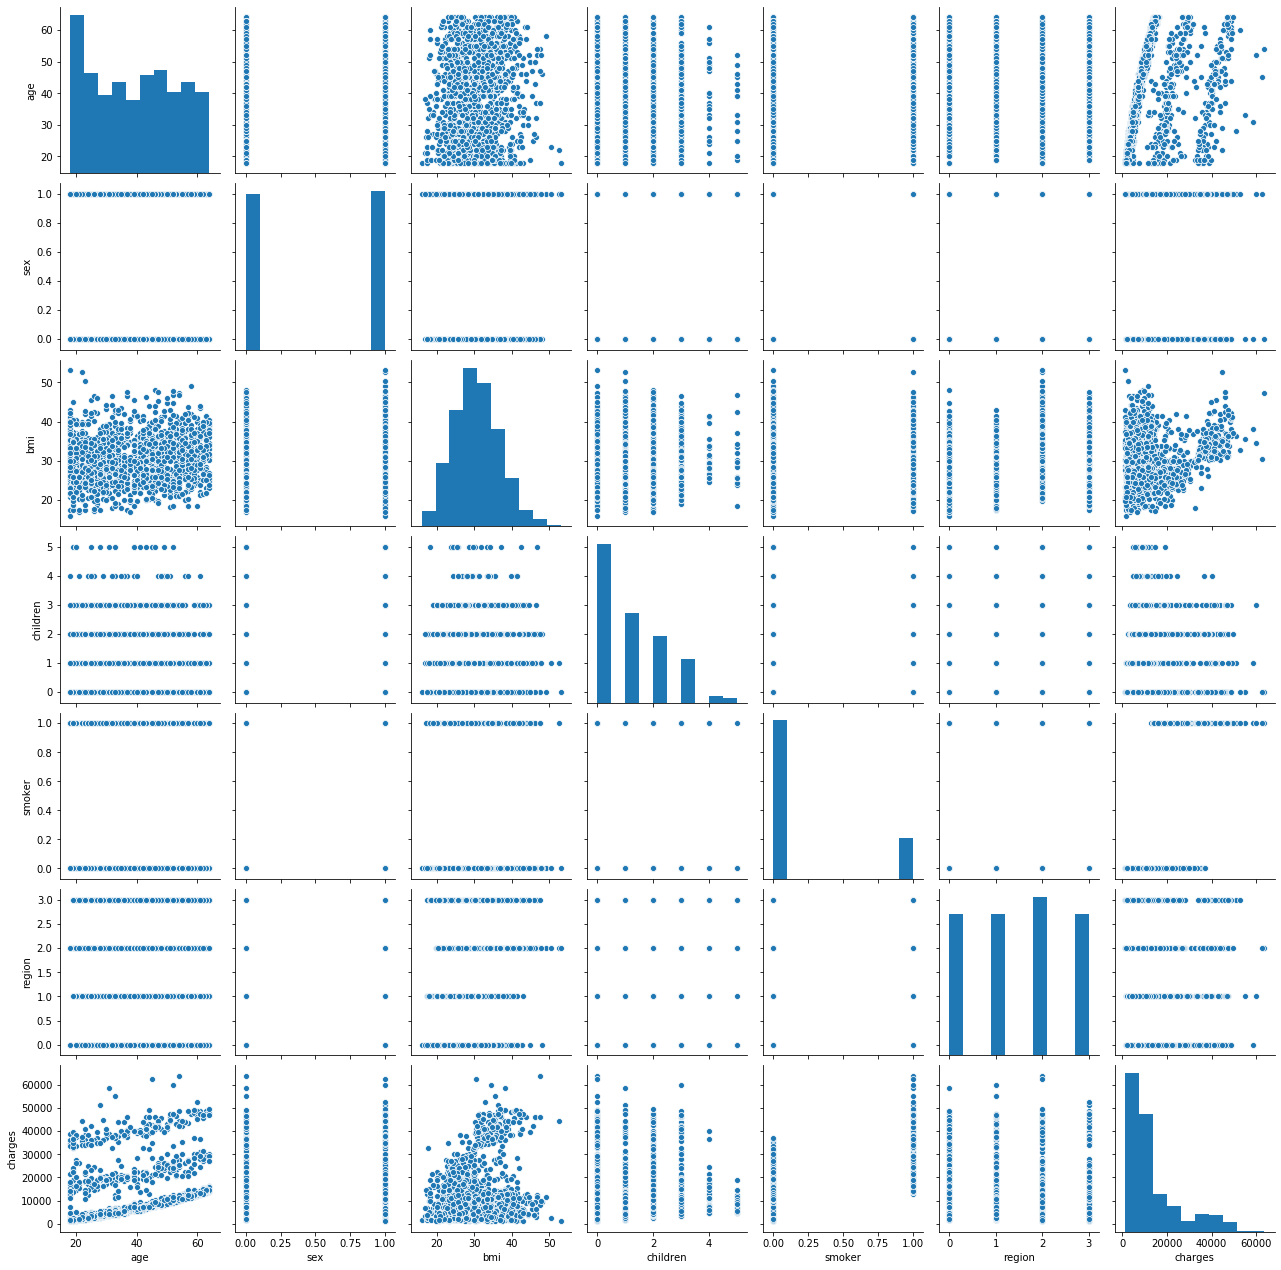

In [230]:
#Pair plot that includes all the columns of the data frame

dfinsurance= copy.deepcopy(insu)
dfinsurance.loc[:,['sex', 'smoker', 'region']] = insu.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(dfinsurance)
plt.show()

In [231]:
insu.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

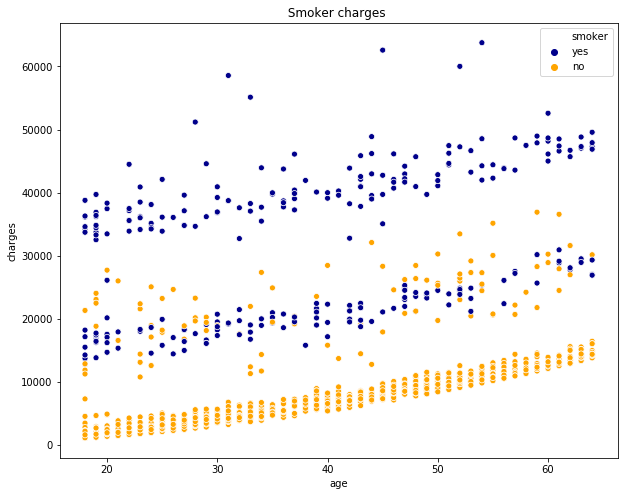

In [190]:
#Do charges of people who smoke differ significantly from the people who don't?
plt.figure(figsize=(10,8))
sns.scatterplot(insu.age,insu.charges,hue=insu.smoker,palette= ['darkblue','orange'] ).set_title(' Smoker charges  ')
plt.show()

In [175]:
#Applying T-test to determine the impact of smoking on the charges.
#Hypothesis
Ho = "Charges of smoker and non-smoker are equal "   
Ha = "Charges of smoker and non-smoker are not equal"
x = np.array(insu[insu.smoker == 'yes'].charges) 
# Selecting charges corresponding to smokers as an array
y = np.array(insu[insu.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers as an array
t, p_value  = st.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test
print(p_value)

8.271435842177219e-283


- Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.
- Smokers pay higher charges in comparison to the non-smokers.

In [178]:
#Does bmi of males differ significantly from that of females
insu.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

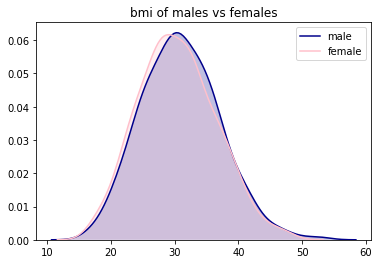

In [215]:
fig.set_size_inches(14,28)
sns.kdeplot(data.loc[data["sex"] == 'male']['bmi'], shade=True, label="male", color='darkblue').set_title('bmi of males vs females')
sns.kdeplot(data.loc[data["sex"] == 'female']['bmi'],shade=True, label="female",color='pink')

Through vizualisation here we can't clearly conclude the relation between bmi and sex, related to male female.

In [232]:
#Check dependency of bmi on gender by Performing an Independent t-test
#Hypothesis
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   
x = np.array(insu[insu.sex == 'male'].bmi)  
y = np.array(insu[insu.sex == 'female'].bmi) 
t, p_value  = st.ttest_ind(x,y, axis = 0)  
print(p_value)

0.08997637178984932


- Accepting nullhypothesis as pvalue >0.05. 
- Hence,Gender has no impact on BMI.

In [233]:
#Is the proportion of smokers significantly different in different genders
# Perform Chi-Square test
#Hypothesis
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   
crosstab = pd.crosstab(insu['sex'],insu['smoker']) 
chi, p_value, dof, expected =  st.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


- Rejecting null hypothesis. 
- Hence,smoking habits differs with the gender.

In [234]:
#Is the distribution of bmi across women with no children, one child and two children, the same
#Anova test

#Hypothesis
Ho = "children has no effect on bmi"   
Ha = "children has an effect on bmi"   

sexfemale = copy.deepcopy(insu[insu['sex'] == 'female'])
zero = sexfemale[sexfemale.children == 0]['bmi']
one = sexfemale[sexfemale.children == 1]['bmi']
two = sexfemale[sexfemale.children == 2]['bmi']

f_stat, p_value = st.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841
